# **CVPS20 // Addressing Overfitting in MLPs**

*October 27, 2020*

This notebook will explore weight regularization as a method for controlling overfitting.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

Load the hand-written digits data,

In [ ]:
# -- load in the hand-written digits data set
fname = "/content/drive/My Drive/cvps20/data/examples/digits.png"
digits = np.asarray(iio.imread(fname)) / 255.

# -- get a list of individual numbers (note they are 20x20 pixels)
nums = digits.reshape(50, 20, 100, 20).transpose(0, 2, 1, 3).reshape(5000, 20, 20)

# -- create features array [NOTE THE .copy()]
nimg = nums.shape[0]
nrow = nums.shape[1]
ncol = nums.shape[2]
feat = nums.reshape(nimg, nrow * ncol).copy()

# -- set the target
targ = np.concatenate((np.full(500, 0), np.full(500, 1), np.full(500, 2), 
                       np.full(500, 3), np.full(500, 4), np.full(500, 5), 
                       np.full(500, 6), np.full(500, 7), np.full(500, 8), 
                       np.full(500, 9)))

In [ ]:
# -- create a training/testing sample
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2, random_state=302)

print("number of training examples : {0}".format(targ_tr.size))
print("number of testing examples  : {0}".format(targ_te.size))

number of training examples : 4000
number of testing examples  : 1000


Let's train a **Multi-layer Perceptron classifier**,

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training accuracy : 0.99875
testing accuracy : 0.891
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       109
           1       1.00      0.96      0.98        92
           2       0.90      0.85      0.87        98
           3       0.85      0.88      0.87        95
           4       0.90      0.92      0.91       110
           5       0.81      0.85      0.83        93
           6       0.85      0.93      0.89       106
           7       0.90      0.92      0.91        91
           8       0.88      0.79      0.84       102
           9       0.89      0.86      0.87       104

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



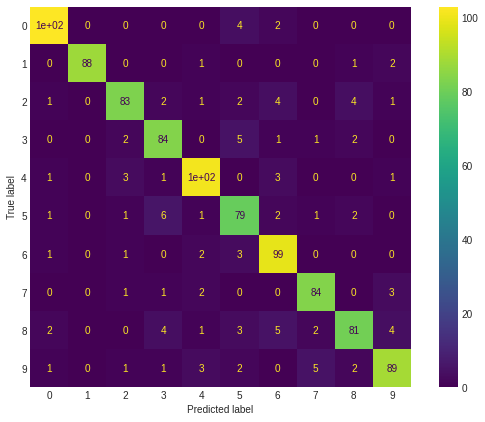

In [ ]:
# -- instantiate an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)

# -- train it
mlp.fit(feat_tr, targ_tr)

# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

# -- evaluate performance metrics
plot_confusion_matrix(mlp, feat_te, targ_te)
print(classification_report(targ_te, pred_te))

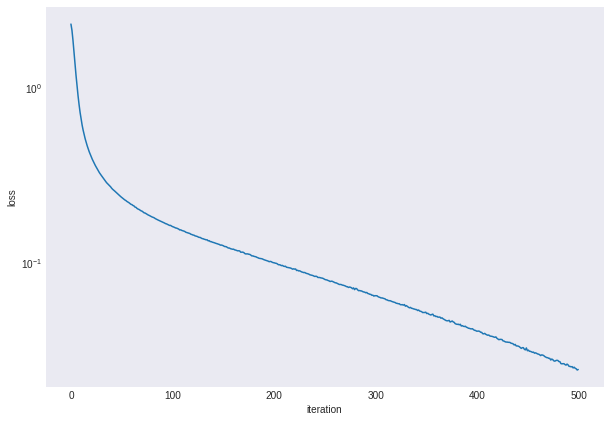

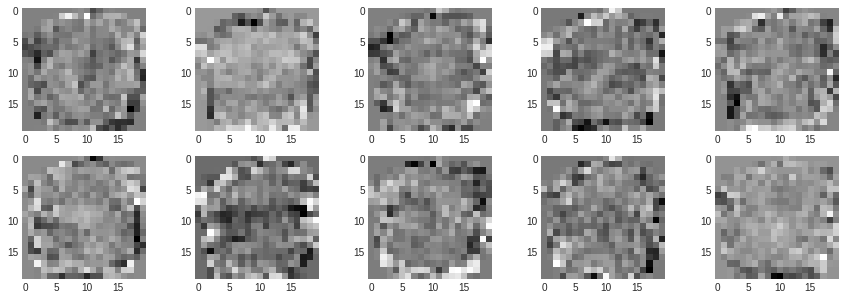

In [ ]:
# -- plot the loss function
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.set_yscale("log")
fig.show()

# -- visualize the weights
ww = mlp.coefs_[0].reshape(20, 20, 10)

fig, ax = plt.subplots(2, 5, figsize=[15, 5])
for ii in range(10):
  ax[ii // 5, ii % 5].imshow(ww[:, :, ii])

In [ ]:
# -- instantiate an MLP classifier with more neurons
mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=500)

# -- train it
mlp.fit(feat_tr, targ_tr)

# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 1.0
testing accuracy : 0.944


In [ ]:
mlp.coefs_[0].shape

(400, 100)

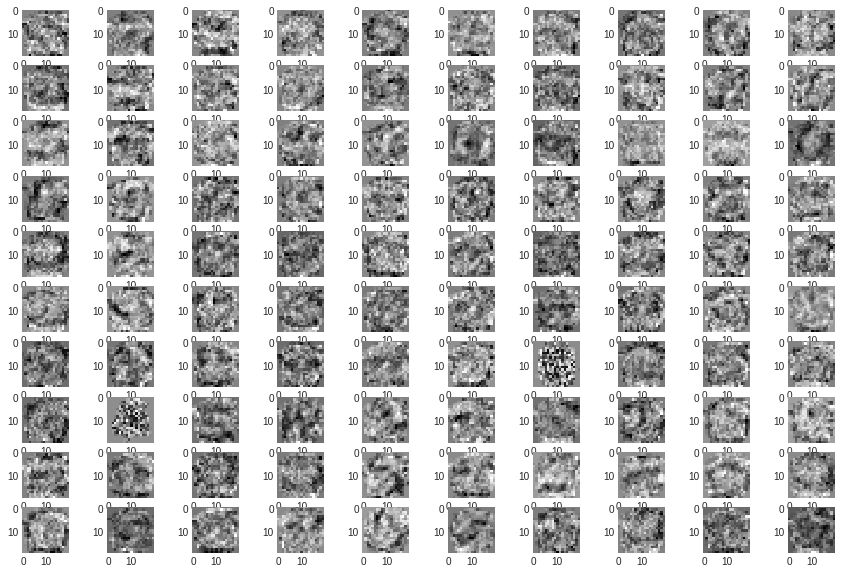

In [ ]:
# -- visualize the weights
ww = mlp.coefs_[0].reshape(20, 20, 100)

fig, ax = plt.subplots(10, 10, figsize=[15, 10])
for ii in range(100):
  ax[ii // 10, ii % 10].imshow(ww[:, :, ii])

This model is clearly overfit.  Let's use weight regularization to reduce the model flexibility,

In [ ]:
# -- instantiate an MLP classifier with more neurons
mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=500, alpha=2)

# -- train it
mlp.fit(feat_tr, targ_tr)

# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 0.94275
testing accuracy : 0.906


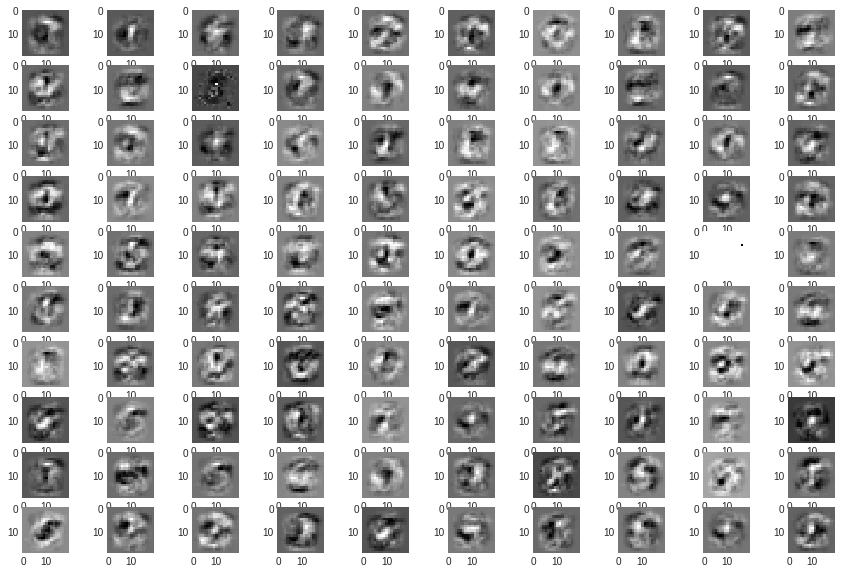

In [ ]:
# -- visualize the weights
ww = mlp.coefs_[0].reshape(20, 20, 100)

fig, ax = plt.subplots(10, 10, figsize=[15, 10])
for ii in range(100):
  ax[ii // 10, ii % 10].imshow(ww[:, :, ii])

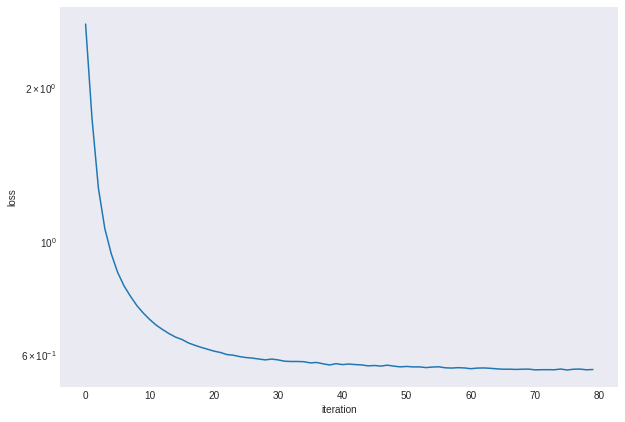

In [ ]:
# -- plot the loss function
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.set_yscale("log")
fig.show()

In [ ]:
# -- instantiate a deeper MLP classifier
mlp = 

# -- train it
mlp.fit(feat_tr, targ_tr)

# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("training accuracy : {0}".format(acc_te))

# -- plot the loss function
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.set_yscale("log")
fig.show()